# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Matplotlib-Basics" data-toc-modified-id="Matplotlib-Basics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matplotlib Basics</a></div><div class="lev3 toc-item"><a href="#A-Simple-Sine/Cosine-plot" data-toc-modified-id="A-Simple-Sine/Cosine-plot-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>A Simple Sine/Cosine plot</a></div><div class="lev2 toc-item"><a href="#Exercise:-Plot-the-Normal-Distribution" data-toc-modified-id="Exercise:-Plot-the-Normal-Distribution-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exercise: Plot the Normal Distribution</a></div><div class="lev2 toc-item"><a href="#Now-as-Boxplots" data-toc-modified-id="Now-as-Boxplots-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Now as Boxplots</a></div><div class="lev2 toc-item"><a href="#And-Histograms" data-toc-modified-id="And-Histograms-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>And Histograms</a></div>

In [1]:
# for matplotlib to work smoothly with Jupyter notebooks the following "Magic" is required:

%matplotlib inline

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import seaborn as sns
import pandas as pd

# Matplotlib Basics
based on http://www.labri.fr/perso/nrougier/teaching/matplotlib/

### A Simple Sine/Cosine plot

- Create a numpy array X with 256 values ranging from -Pi to +Pi 

In [3]:
X = np.linspace(-np.pi, np.pi, num=256)
X

array([-3.14159265, -3.11695271, -3.09231277, -3.06767283, -3.04303288,
       -3.01839294, -2.993753  , -2.96911306, -2.94447311, -2.91983317,
       -2.89519323, -2.87055329, -2.84591335, -2.8212734 , -2.79663346,
       -2.77199352, -2.74735358, -2.72271363, -2.69807369, -2.67343375,
       -2.64879381, -2.62415386, -2.59951392, -2.57487398, -2.55023404,
       -2.52559409, -2.50095415, -2.47631421, -2.45167427, -2.42703432,
       -2.40239438, -2.37775444, -2.3531145 , -2.32847456, -2.30383461,
       -2.27919467, -2.25455473, -2.22991479, -2.20527484, -2.1806349 ,
       -2.15599496, -2.13135502, -2.10671507, -2.08207513, -2.05743519,
       -2.03279525, -2.0081553 , -1.98351536, -1.95887542, -1.93423548,
       -1.90959553, -1.88495559, -1.86031565, -1.83567571, -1.81103577,
       -1.78639582, -1.76175588, -1.73711594, -1.712476  , -1.68783605,
       -1.66319611, -1.63855617, -1.61391623, -1.58927628, -1.56463634,
       -1.5399964 , -1.51535646, -1.49071651, -1.46607657, -1.44

- Create two arrays C,S with values for the sine/cosine of X

In [4]:
C = np.sin(X)
S = np.cos(X)

- Plot the curves using defaults

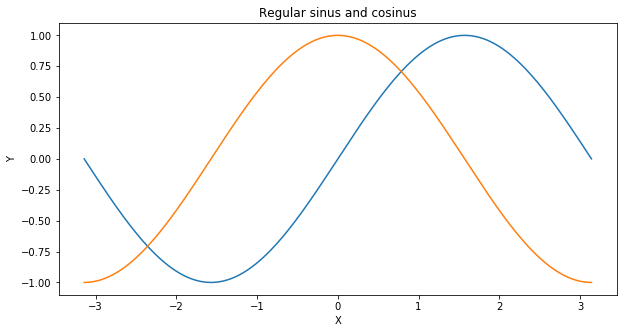

In [5]:
fig, ax = plt.subplots(figsize=(10,5))


plt.plot(X, C)

plt.plot(X, S)

plt.title('Regular sinus and cosinus')
plt.xlabel('X', fontsize= 10)
plt.ylabel('Y', fontsize= 10)

plt.show()

- Change colors and line widths

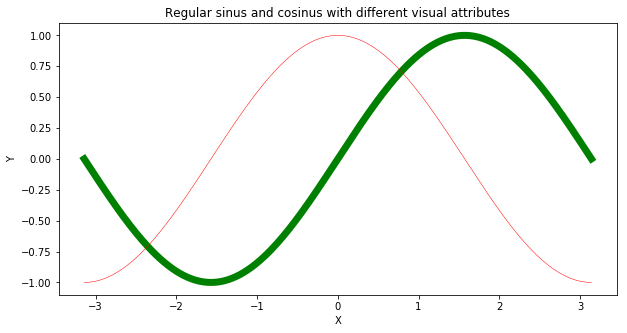

In [6]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(X, C, linewidth=7.0, c = "g")
plt.plot(X, S, linewidth=0.5, c = "r")

plt.title('Regular sinus and cosinus with different visual attributes')
plt.xlabel('X', fontsize= 10)
plt.ylabel('Y', fontsize= 10)

plt.show()

## Exercise: Plot the Normal Distribution

#### Task 1: Reproduce the following image as closely as you can:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/720px-Normal_Distribution_PDF.svg.png'>

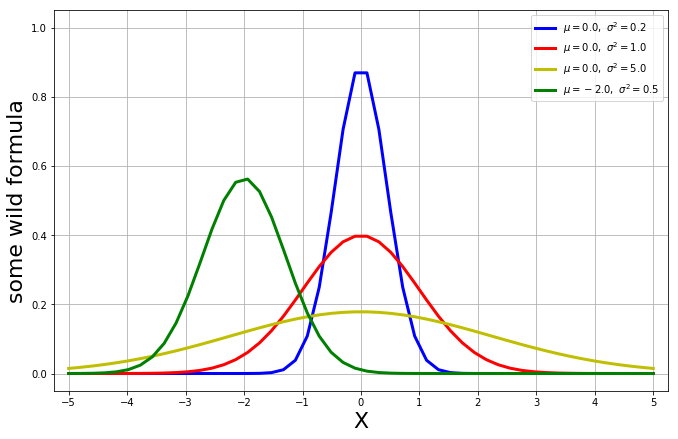

In [7]:
params = [(0,0.2,'b'),(0, 1.0, 'r'),(0, 5.0, 'y'),(-2, 0.5, 'g')]

x = np.linspace(-5, 5)

plt.figure(figsize=(11,7))
plt.axis([-5.25, 5.25, -0.05, 1.05])
plt.xticks(np.arange(-5, 6, 1))

for mu, variance, color in params:
    y = 1/(np.sqrt(2*np.pi*(variance)))*np.exp( -(x-mu)**2 /(2 * (variance)))
           
    label = '$\mu = %.1f, \ \sigma^2=%.1f$' %(mu, variance)

    plt.plot(x,y, label=label, color = color, linewidth = 3)

    plt.grid(True)
    
plt.xlabel('X', fontsize= 22)
plt.ylabel('wild formula', fontsize= 22)
plt.legend()
plt.show()

#### Task 2: Now plot the above distributions as Boxplots

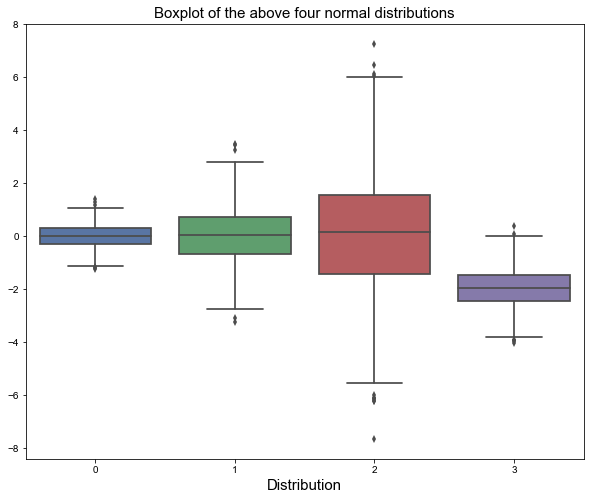

In [8]:
distributions = []

for mu, variance, color in params:
    y = np.random.normal(mu, np.sqrt(variance), 1000)
    distributions.append(y)

index = ["blue", "red", "yellow", "green"]
s = pd.Series(distributions, index = index)


fig, ax = plt.subplots(figsize=(10,8))
sns.set(context='notebook', style='whitegrid')
bplot = sns.boxplot(data=s)

plt.title('Boxplot of the above four normal distributions', fontsize= 15)
plt.xlabel('Distribution', fontsize= 15)

plt.show()

Standart Boxplot of four normal distributions seen above. The upper end of the box represents the upper quartile, the lower bound is the lower quartile. The line in the middle is the the median. The whiskers represent the upper and the lower adjacent value, the dots the outsiders.

#### Task 3: ... and as histograms

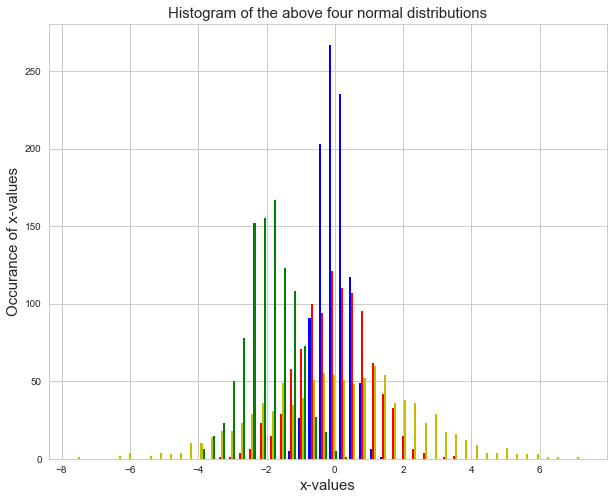

In [9]:
color = ["b", "r", "y", "g"]

fig, ax = plt.subplots(figsize=(10,8))
hplot = plt.hist(distributions, color=color, bins = 50)

plt.title('Histogram of the above four normal distributions', fontsize= 15)
plt.xlabel('x-values', fontsize= 15)
plt.ylabel('Occurance of x-values', fontsize= 15)

plt.show()

The same normal distributions as histogram. On the x-axis we see the value and on the y-axis the count of the respective x-axis.